In [1]:

import numpy as np
import pandas as pd
from tabulate import tabulate

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer,precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

In [2]:
file_path = pd.read_csv('./HR-Employee-Attrition.csv')
data = file_path

data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
pd.options.display.max_columns = 200

data.head()
     

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [6]:

data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
data.shape

(1470, 35)

In [8]:
data.dtypes.value_counts()

int64     26
object     9
Name: count, dtype: int64

In [9]:
#checking for missing values to be sure
missing_value = data.isnull().sum()
print('Missing Values:',missing_value, sep='\n')

print('===============================================')

data_unique = data.nunique()
print('Unique data:', data_unique, sep='\n')


Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole      

In [10]:
not_needed_columns = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
data.drop(columns=not_needed_columns, inplace=True)

In [11]:
attrition_counts = data['Attrition'].value_counts()
print(attrition_counts)

Attrition
No     1233
Yes     237
Name: count, dtype: int64


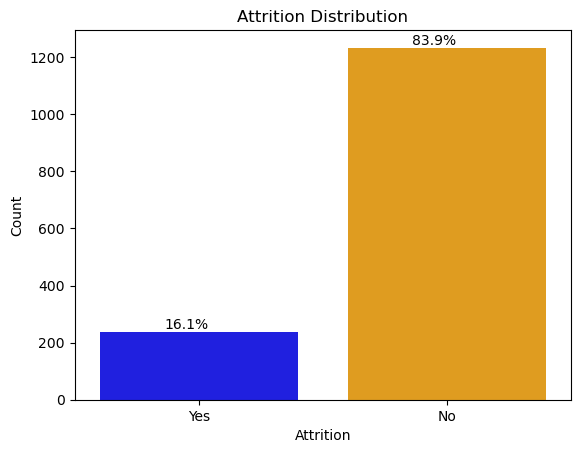

<Figure size 800x600 with 0 Axes>

In [12]:
total = len(data)
ax = sns.countplot(x='Attrition', data=data, palette=['blue', 'orange'], hue='Attrition', legend=False)

# Annotate each bar with the percentage
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Add titles and labels
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')

# Adjust figure size
plt.figure(figsize=(8, 6))

plt.show()

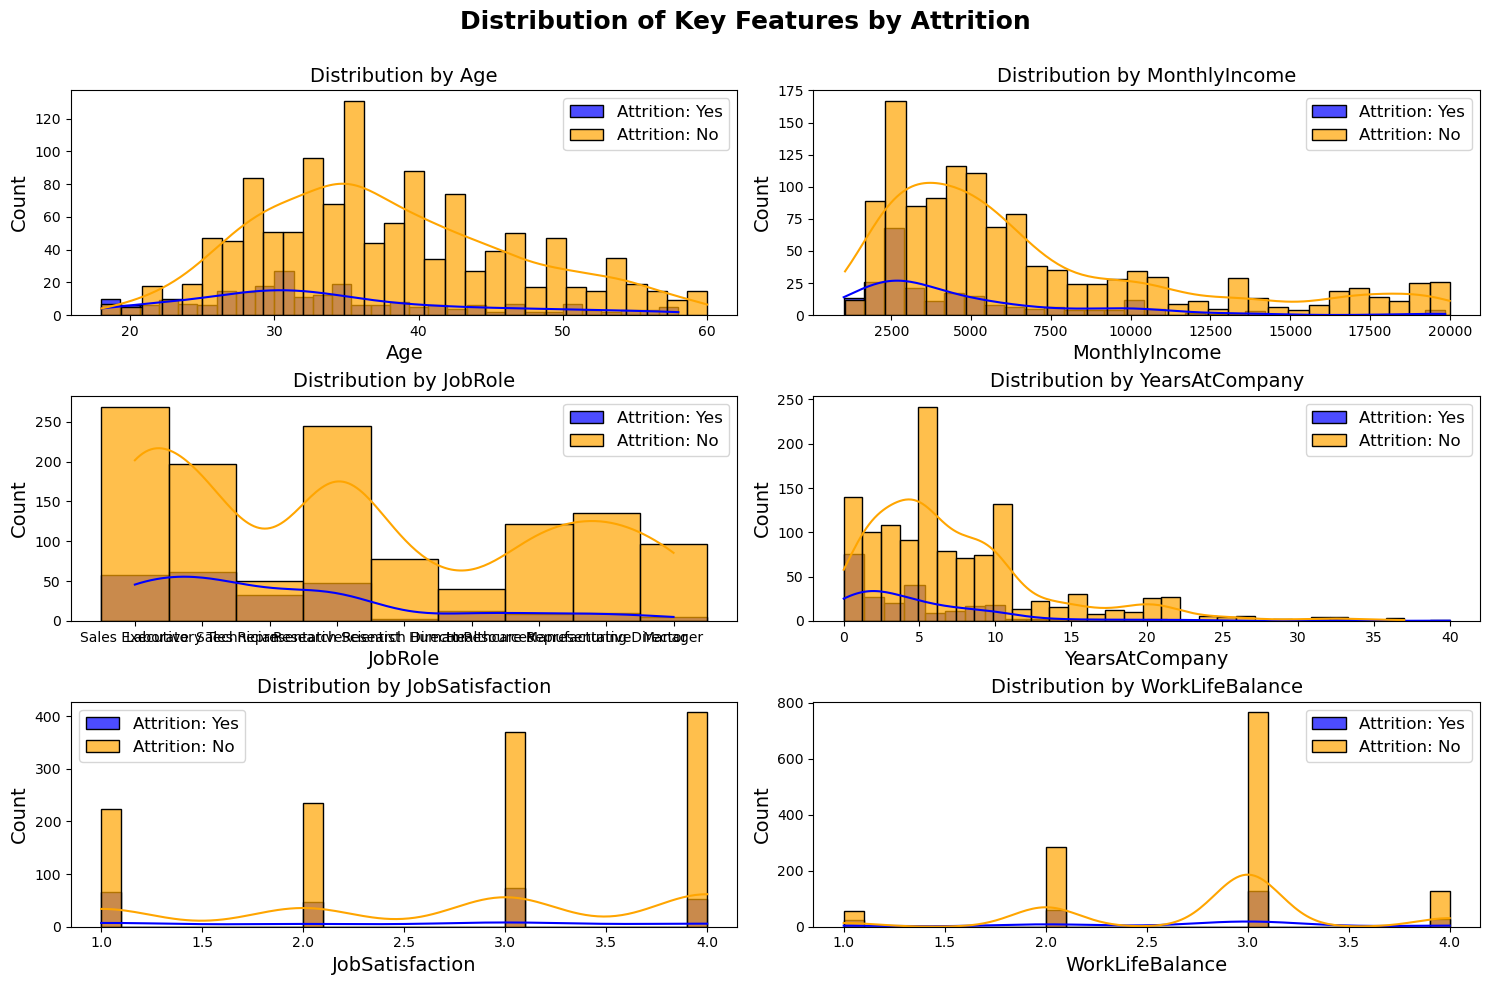

In [13]:
key_features = ['Age', 'MonthlyIncome', 'JobRole', 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance']

attrition_yes = data[data['Attrition'] == 'Yes']
attrition_no = data[data['Attrition'] == 'No']

# Examining distribution
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

for ax, feature in zip(axes.flatten(), key_features):
    sns.histplot(data=attrition_yes, x=feature, ax=ax, color='blue', label='Attrition: Yes', bins=30, kde=True, alpha=0.7)
    sns.histplot(data=attrition_no, x=feature, ax=ax, color='orange', label='Attrition: No', bins=30, kde=True, alpha=0.7)

    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.set_title(f'Distribution by {feature}', fontsize=14)
    ax.legend(fontsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust space for suptitle
fig.suptitle('Distribution of Key Features by Attrition', fontsize=18, fontweight='bold')  # No LaTeX, using bold for emphasis

plt.show()

Healthcare Representative      No         122
Healthcare Representative      Yes        9

Human Resources                No         40
Human Resources                Yes        12

Laboratory Technician          No         197
Laboratory Technician          Yes        62

Manager                        No         97
Manager                        Yes        5

Manufacturing Director         No         135
Manufacturing Director         Yes        10

Research Director              No         78
Research Director              Yes        2

Research Scientist             No         245
Research Scientist             Yes        47

Sales Executive                No         269
Sales Executive                Yes        57

Sales Representative           No         50
Sales Representative           Yes        33


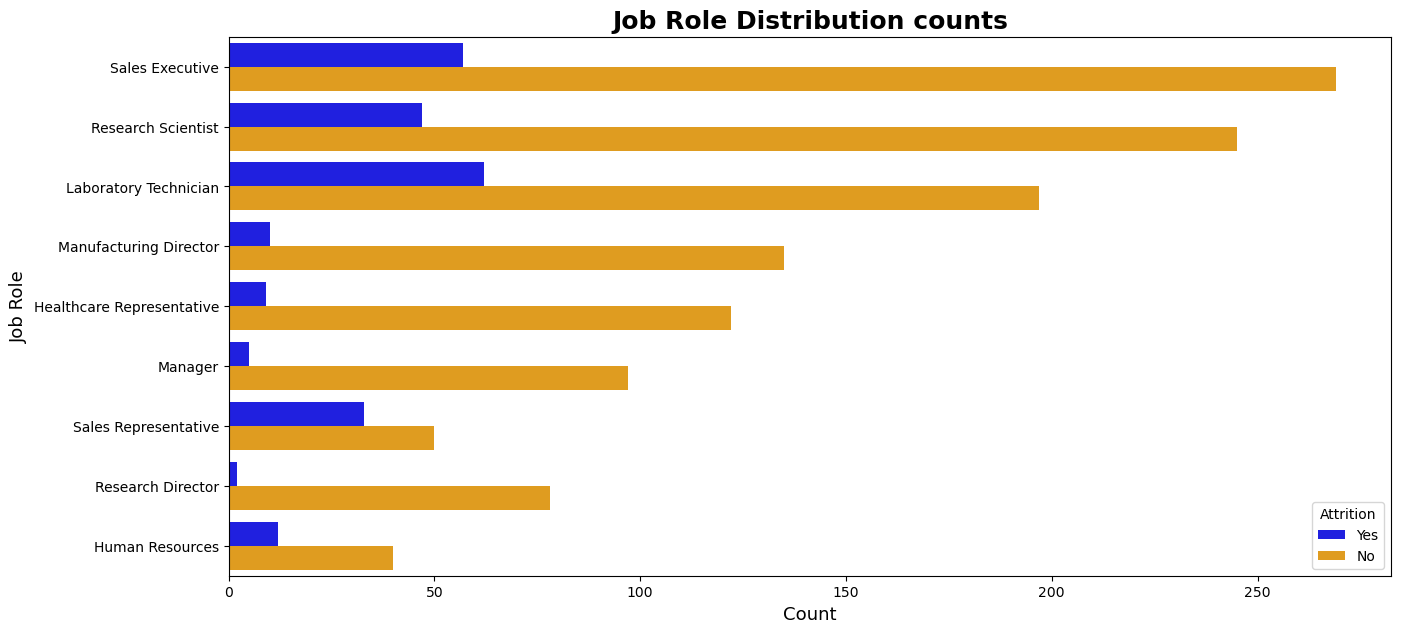

In [14]:
# Checking job describtion by role

# Grouping by 'JobRole' and 'Attrition' to get the counts
job_role_counts = data.groupby(['JobRole', 'Attrition']).size().reset_index(name='Count')

# Iterate and print with a line space between each job role
current_role = None
for _, row in job_role_counts.iterrows():
    job_role = row['JobRole']
    if job_role != current_role:
        if current_role is not None:
            print()  #space
        current_role = job_role
    print(f"{row['JobRole']:30} {row['Attrition']:10} {row['Count']}")


plt.figure(figsize=(15,7))
sns.countplot(data=data, y='JobRole', hue='Attrition', palette=['blue', 'orange'])
plt.title('Job Role Distribution counts', fontsize=18, fontweight='bold')
plt.xlabel('Count', fontsize=13)
plt.ylabel('Job Role', fontsize=13)
plt.show()

In [15]:
# Features and target
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# Encoding categorical variables
categorical_cols = X.select_dtypes(include=[object]).columns.tolist()

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X = X.astype(int)

#Encode Attrition
y = LabelEncoder().fit_transform(y)

In [16]:
correlation_matrix = X.corr()
correlation_df = pd.DataFrame(correlation_matrix)

# Display the DataFrame as a table
print(tabulate(correlation_df, headers='keys', tablefmt='pretty', floatfmt=".2f"))

+-----------------------------------+------------------------+------------------------+------------------------+------------------------+-------------------------+-------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+-----------------------+------------------------+------------------------+--------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+-------------------------+------------------------+----------------------------------+------------------------------+-----------------------------------+-------------------------+------------------------------+--------------------------+------------------------+------------------------+---------------------------------+-------------------------+-------------------------+-------------------------------+------------------------+-----

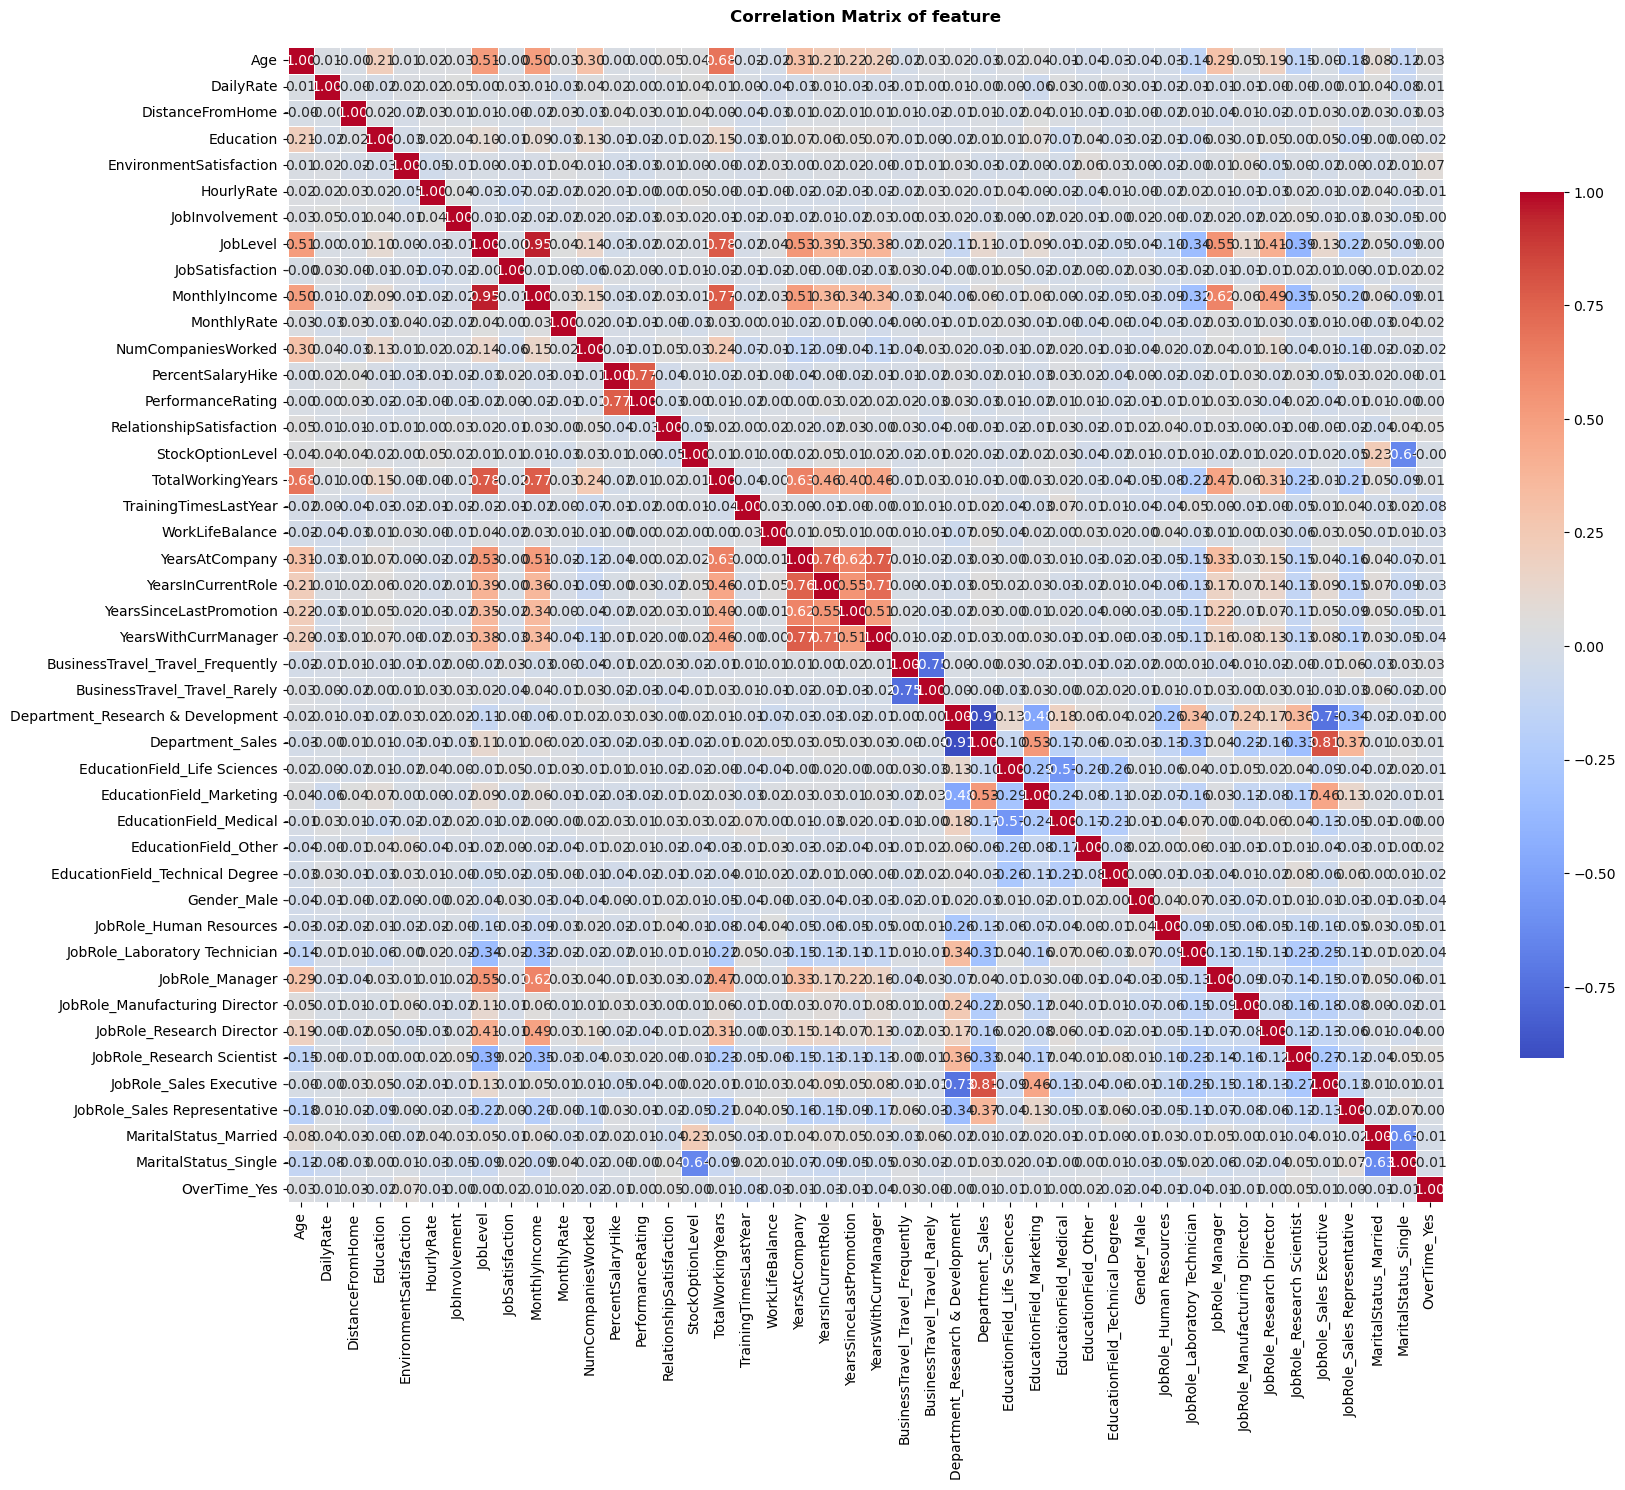

In [17]:

correlation_matrix = X.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, cbar_kws={'shrink': .75}, linewidths=0.5)
plt.title('Correlation Matrix of feature\n', fontweight='bold')
plt.show()

In [18]:
X = X.drop(columns=['MonthlyIncome', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager'])

In [19]:
"Building Model"

'Building Model'

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int32
 1   DailyRate                          1470 non-null   int32
 2   DistanceFromHome                   1470 non-null   int32
 3   Education                          1470 non-null   int32
 4   EnvironmentSatisfaction            1470 non-null   int32
 5   HourlyRate                         1470 non-null   int32
 6   JobInvolvement                     1470 non-null   int32
 7   JobLevel                           1470 non-null   int32
 8   JobSatisfaction                    1470 non-null   int32
 9   MonthlyRate                        1470 non-null   int32
 10  NumCompaniesWorked                 1470 non-null   int32
 11  PercentSalaryHike                  1470 non-null   int32
 12  PerformanceRating   

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Balance data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


Accuracy: 0.8877551020408163
Confusion Matrix:
 [[243  12]
 [ 21  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       255
           1       0.60      0.46      0.52        39

    accuracy                           0.89       294
   macro avg       0.76      0.71      0.73       294
weighted avg       0.88      0.89      0.88       294



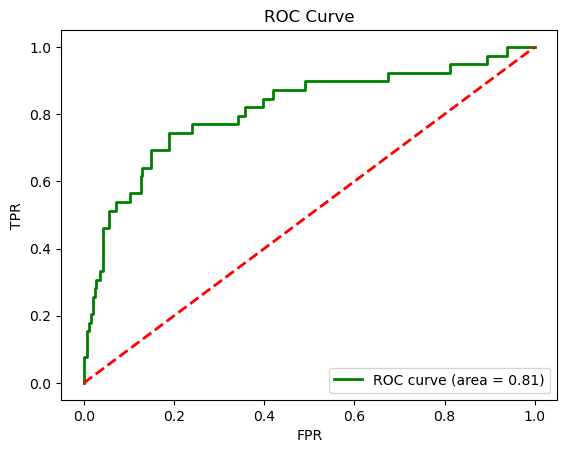

AUC-ROC Score (Logistic Regression): 0.8130718954248366


In [22]:
#Logistic Regression model

logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_train_resampled, y_train_resampled)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

ypp = logistic_model.predict_proba(X_test)[:, 1]

fpr, tpr, th = roc_curve(y_test, ypp)
auc = roc_auc_score(y_test, ypp)

lw = 2
plt.plot(fpr, tpr, color='green', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


print('AUC-ROC Score (Logistic Regression):', auc)


Best Parameters (Logistic Regression): {'C': 10, 'penalty': 'l2'}
Accuracy (Tuned Logistic Regression): 0.8945578231292517
Confusion Matrix (Tuned Logistic Regression):
 [[243  12]
 [ 19  20]]
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       255
           1       0.62      0.51      0.56        39

    accuracy                           0.89       294
   macro avg       0.78      0.73      0.75       294
weighted avg       0.89      0.89      0.89       294



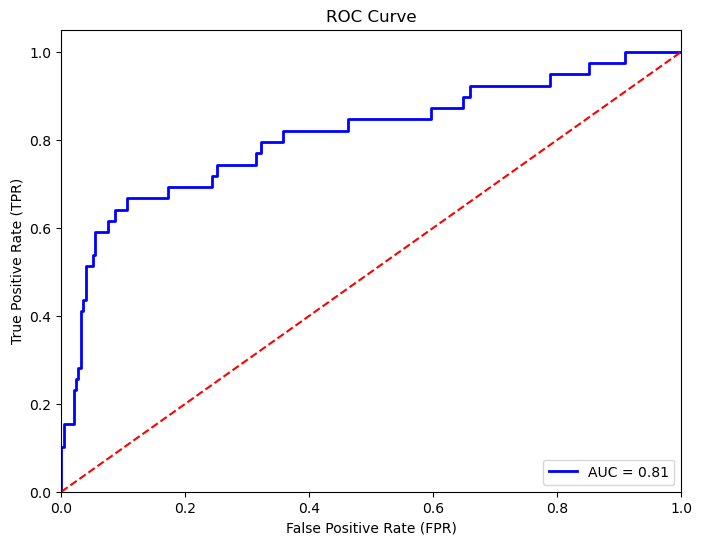

AUC-ROC Score (GridSeachCV): 0.8095525389643037


In [23]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

# GrridSearchCV
grid_search_lr = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=1000), param_grid_lr, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train_resampled, y_train_resampled)

# Best parameters
best_params_lr = grid_search_lr.best_params_
best_estimator_lr = grid_search_lr.best_estimator_
best_estimator_lr.fit(X_train_resampled, y_train_resampled)

y_pred_tuned = best_estimator_lr.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
classification_rep_tuned = classification_report(y_test, y_pred_tuned)


print('\nBest Parameters (Logistic Regression):', best_params_lr)
print("Accuracy (Tuned Logistic Regression):", accuracy_tuned)
print("Confusion Matrix (Tuned Logistic Regression):\n", conf_matrix_tuned)
print("Classification Report (Logistic Regression):\n", classification_rep_tuned)


#AUC-ROC
y_prob_lr = best_estimator_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)


plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'AUC = {auc_lr:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print('AUC-ROC Score (GridSeachCV):', auc_lr)



Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy (Tuned Random Forest): 0.8809523809523809
Confusion Matrix (Tuned Random Forest):
 [[249   6]
 [ 29  10]]
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       255
           1       0.62      0.26      0.36        39

    accuracy                           0.88       294
   macro avg       0.76      0.62      0.65       294
weighted avg       0.86      0.88      0.86       294



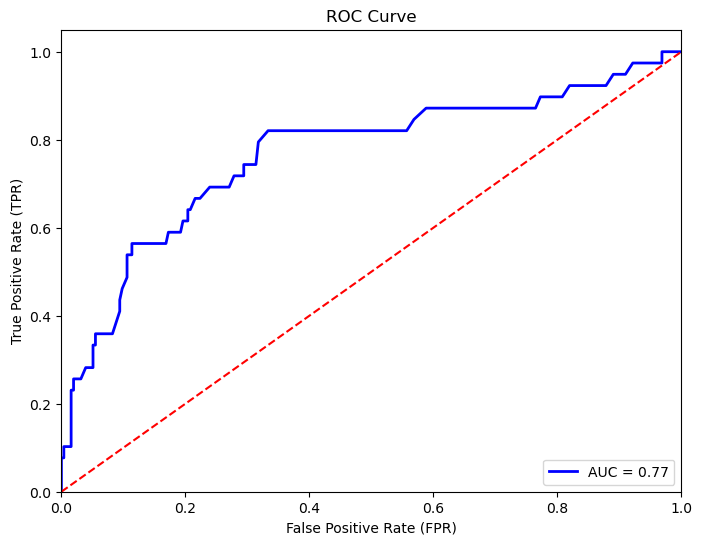

AUC-ROC Score (Random forest): 0.7662141779788839


In [24]:
# Random Forest
# Hyperparameter tunning

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

#GridSerachCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Best parameters
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_
best_estimator_rf.fit(X_train_resampled, y_train_resampled)

y_pred_tuned_rf = best_estimator_rf.predict(X_test)
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
conf_matrix_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)
classification_rep_tuned_rf = classification_report(y_test, y_pred_tuned_rf)


print('\nBest Parameters (Random Forest):', best_params_rf)
print("Accuracy (Tuned Random Forest):", accuracy_tuned_rf)
print("Confusion Matrix (Tuned Random Forest):\n", conf_matrix_tuned_rf)
print("Classification Report (Random Forest):\n", classification_rep_tuned_rf)


# AUC-ROC
y_prob_rf = best_estimator_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)


plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'AUC = {auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print('AUC-ROC Score (Random forest):', auc_rf)


Best Parameters (Gradient Boosting): {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Accuracy (Tuned Gradient Boosting): 0.8707482993197279
Confusion Matrix (Tuned Gradient Boosting):
 [[242  13]
 [ 25  14]]
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.52      0.36      0.42        39

    accuracy                           0.87       294
   macro avg       0.71      0.65      0.68       294
weighted avg       0.85      0.87      0.86       294



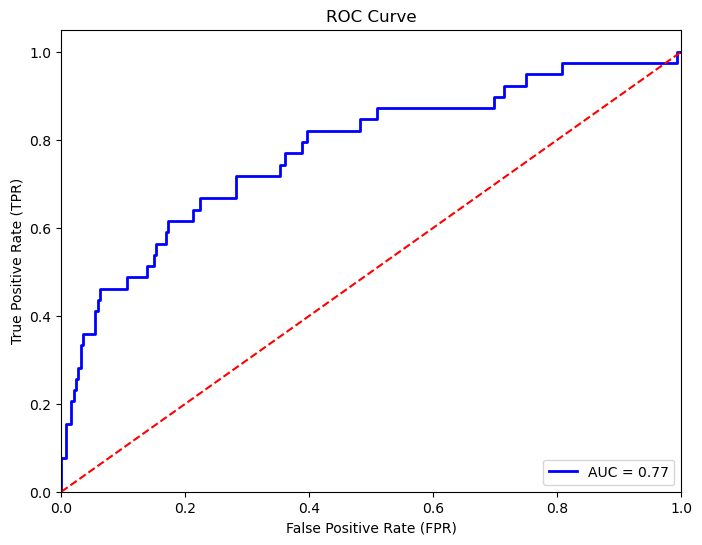

AUC-ROC Score (Gradient boosting): 0.7745600804424334


In [25]:
#Gradient boosting

#hyperparameter tuning


param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

#GridSearchCV

grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid_gb, cv=5, n_jobs=-1)

grid_search_gb.fit(X_train_resampled, y_train_resampled)
best_params_gb = grid_search_gb.best_params_
best_estimator_gb = grid_search_gb.best_estimator_
best_estimator_gb.fit(X_train_resampled, y_train_resampled)

y_pred_tuned_gb = best_estimator_gb.predict(X_test)
accuracy_tuned_gb = accuracy_score(y_test, y_pred_tuned_gb)
conf_matrix_tuned_gb = confusion_matrix(y_test, y_pred_tuned_gb)
classification_rep_tuned_gb = classification_report(y_test, y_pred_tuned_gb)

print('\nBest Parameters (Gradient Boosting):', best_params_gb)
print("Accuracy (Tuned Gradient Boosting):", accuracy_tuned_gb)
print("Confusion Matrix (Tuned Gradient Boosting):\n", conf_matrix_tuned_gb)
print("Classification Report (Gradient Boosting):\n", classification_rep_tuned_gb)

# AUC-ROC
y_prob_gb = best_estimator_gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
auc_gb = roc_auc_score(y_test, y_prob_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'AUC = {auc_gb:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


print('AUC-ROC Score (Gradient boosting):', auc_gb)

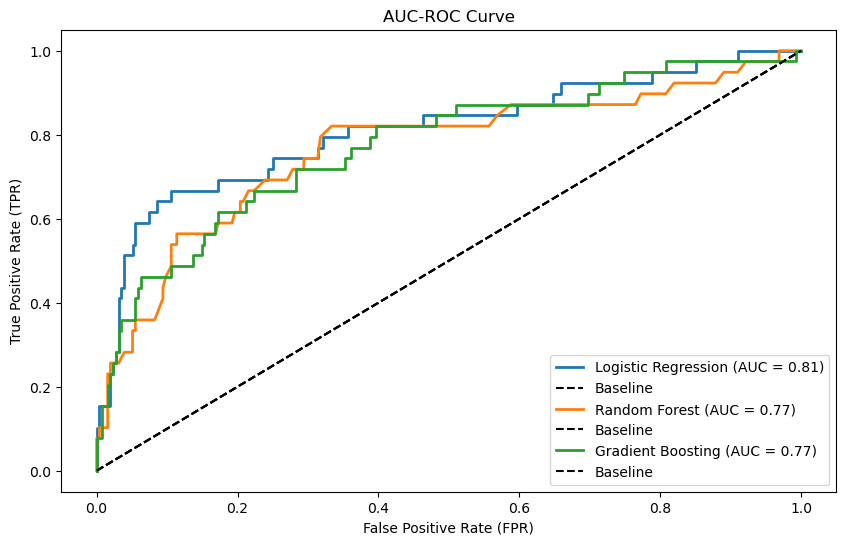


Model Evaluation Metrics:
                 Model       AUC  Precision    Recall  F1 Score
0  Logistic Regression  0.809553   0.625000  0.512821  0.563380
1        Random Forest  0.766214   0.625000  0.256410  0.363636
2    Gradient Boosting  0.774560   0.518519  0.358974  0.424242


In [26]:
#models

models = [best_estimator_lr, best_estimator_rf, best_estimator_gb]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

plt.figure(figsize=(10, 6))
auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for model, name in zip(models, model_names):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    auc = roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)


    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    plt.plot([0, 1], [0, 1], 'k--', label='Baseline')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

# Consolidated Results
metrics_df = pd.DataFrame({
    'Model': model_names,
    'AUC': auc_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

print("\nModel Evaluation Metrics:")
print(metrics_df)

                             Feature  Coefficient
39                      OverTime_Yes     1.562277
19  BusinessTravel_Travel_Frequently     0.194873
10                NumCompaniesWorked     0.144515
28                       Gender_Male     0.107700
18           YearsSinceLastPromotion     0.103847
2                   DistanceFromHome     0.034979
38              MaritalStatus_Single     0.028427
5                         HourlyRate     0.001976
9                        MonthlyRate     0.000013
1                          DailyRate    -0.000148


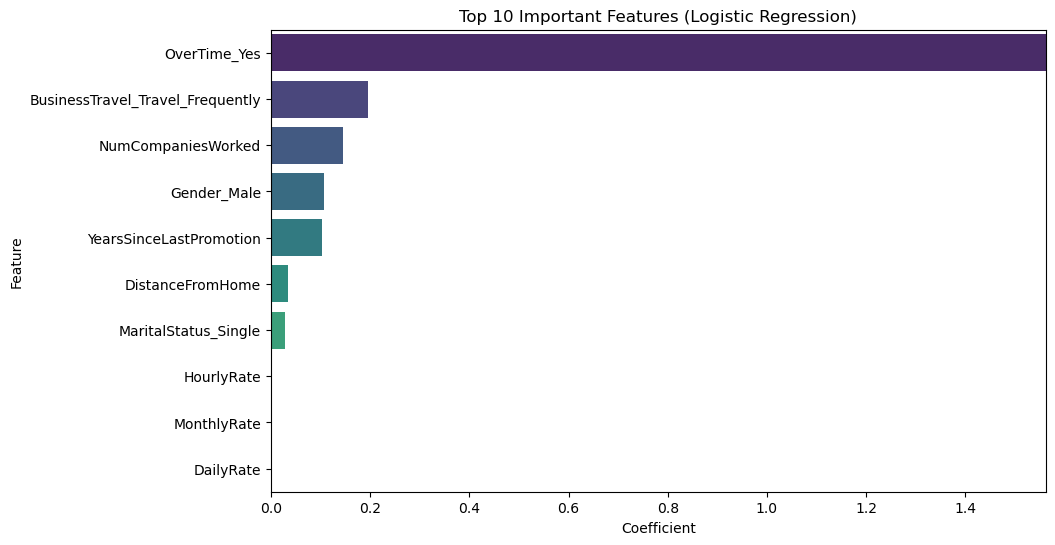

In [66]:
# Examining top 10 Features
coefficients_lr = best_estimator_lr.coef_[0]
importance_df_lr = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients_lr})
importance_df_lr = importance_df_lr.sort_values(by='Coefficient', ascending=False)
top_10_features_lr = importance_df_lr.head(10)


print(top_10_features_lr)

coefficients_lr = best_estimator_lr.coef_[0]
importance_df_lr = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients_lr})
importance_df_lr = importance_df_lr.sort_values(by='Coefficient', ascending=False)
top_10_features_lr = importance_df_lr.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_10_features_lr, palette='viridis', hue='Feature', legend=False)
plt.xlim(0, top_10_features_lr['Coefficient'].max())  # Set the x-axis limit from 0 to the maximum coefficient
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Important Features (Logistic Regression)')
plt.show()

In [28]:
'done'

'done'